# Predicting wine quality

This problem deals with predicting red wine quality. Picking up good wines takes professional sommelier a lot of knowledge and experience, they say. Let us see if ML can do this job.

The [data](https://archive.ics.uci.edu/ml/datasets/wine+quality) for this problem are the results of a chemical analysis of vinho verde wine samples, from the north of Portugal. Your goal is to predict wine quality based on physicochemical tests. 

Attributes of the data are:

* fixed acidity 
* volatile acidity 
* citric acid 
* residual sugar 
* chlorides 
* free sulfur dioxide 
* total sulfur dioxide 
* density 
* pH 
* sulphates 
* alcohol 
* quality (score between 0 and 10)

### Exploring the data

In [41]:
import itertools
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import csv
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import xgboost as xgb

%matplotlib inline

Load the data from `wine_data.csv`. If there are any missing values or non-numerical features, fix them.

In [42]:
data = pd.read_csv("wine_data.csv", sep = ";")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Preparing the subsets

Split the dataset into three subsets: train, CV and test using 60-20-20% rule. Keep wine quality separately as a label we want to predict.

In [44]:
train = data.sample(frac=0.6,random_state=200)
test = data.drop(train.index)
cv = test[:len(test)//2]
test = test[len(test)//2 + 1:]

train_y = train[['quality']]
train.__delitem__('quality')
train_set = train
cv_y = cv[['quality']]
cv.__delitem__('quality')
cv_set = cv
test_y = test[['quality']]
test.__delitem__('quality')
test_set = test

### Training logistic regression

Train logistic regression to classify the wine. Use scikit-learn implementation of this model. Tweak the hyperparameters of the model to get the maximum performance on CV set.

In [45]:
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(train, train_y.values.ravel())

clf.score(cv, cv_y)

0.571875

In [46]:
lr_train_predicted = clf.predict(train)
lr_cv_predicted = clf.predict(cv)
lr_test_predicted = clf.predict(test)

### Training SVM

Train support vector machines to classify the wine. Use scikit-learn implementation of this model. Tweak the hyperparameters of the model to get the maximum performance on CV set.

Keep the model and the results separate from the logistic regression. You will need them for comparing the performance of the models.

In [47]:
clf = svm.LinearSVC()
clf.fit(train, train_y.values.ravel())  

clf.score(cv, cv_y)

0.51875

In [48]:
svm_train_predicted = clf.predict(train)
svm_cv_predicted = clf.predict(cv)
svm_test_predicted = clf.predict(test)

### Training XGBoost

Train XGBoost to classify the wine. Use xgboost implementation of this model. Tweak the hyperparameters of the model to get the maximum performance on CV set.

Keep the model and the results separate from two others. You will need them for comparing the performance of the models.

In [49]:
model = xgb.XGBClassifier()
model.fit(train, train_y.values.ravel())

model.score(cv, cv_y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.63125

In [50]:
xgb_train_predicted = model.predict(train)
xgb_cv_predicted = model.predict(cv)
xgb_test_predicted = model.predict(test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Plotting confusion matrices

Confusion matrix is a useful tool to understand what errors the models make. This code plots confusion matrices on CV set for all three models you have trained. These can help you with tweaking hyperparameters of the models as well.

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0   0   3   0   0   0]
 [  0   0  11   4   0   0]
 [  0   1 126  27   1   0]
 [  0   0  48  57   1   0]
 [  0   0   3  33   0   0]
 [  0   0   0   4   1   0]]
Confusion matrix, without normalization
[[  0   0   3   0   0   0]
 [  0   0  13   1   1   0]
 [  0   0 133  18   4   0]
 [  0   0  72  24  10   0]
 [  0   0   8  19   9   0]
 [  0   0   1   2   2   0]]
Confusion matrix, without normalization
[[  0   0   2   1   0   0]
 [  0   1  12   2   0   0]
 [  0   0 121  33   1   0]
 [  0   1  32  69   4   0]
 [  0   0   4  21  11   0]
 [  0   0   0   3   2   0]]


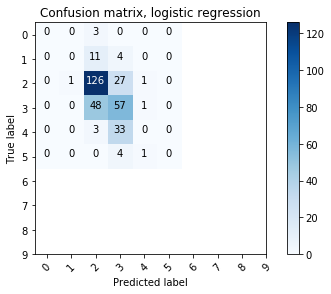

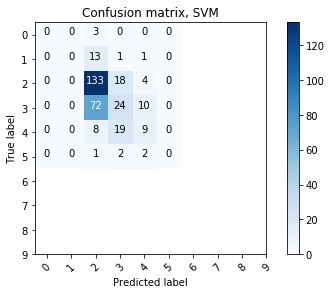

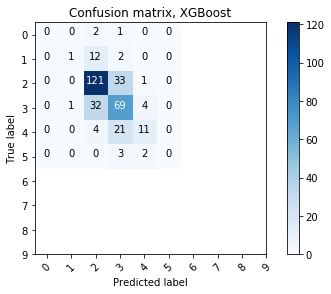

In [52]:
np.set_printoptions(precision=2)
class_names = range(10)

# Plot non-normalized confusion matrix for logistic regression
lr_cnf_matrix = confusion_matrix(cv_y, lr_cv_predicted)
plt.figure()
plot_confusion_matrix(lr_cnf_matrix, classes=class_names,
                      title='Confusion matrix, logistic regression')

# Plot non-normalized confusion matrix for SVM
svm_cnf_matrix = confusion_matrix(cv_y, svm_cv_predicted)
plt.figure()
plot_confusion_matrix(svm_cnf_matrix, classes=class_names,
                      title='Confusion matrix, SVM')

# Plot non-normalized confusion matrix for XGBoost
xgb_cnf_matrix = confusion_matrix(cv_y, xgb_cv_predicted)
plt.figure()
plot_confusion_matrix(xgb_cnf_matrix, classes=class_names,
                      title='Confusion matrix, XGBoost')

### Check test set performance

Now, check the accuracy of all three models on the test set and compare it with the CV test accuracy. Explain the results.

Cool results 😎